Эпоха 1/10, Потери: 0.0812
Эпоха 2/10, Потери: 0.0464
Эпоха 3/10, Потери: 0.0381
Эпоха 4/10, Потери: 0.0320
Эпоха 5/10, Потери: 0.0286
Эпоха 6/10, Потери: 0.0269
Эпоха 7/10, Потери: 0.0246
Эпоха 8/10, Потери: 0.0217
Эпоха 9/10, Потери: 0.0202
Эпоха 10/10, Потери: 0.0195
Точность на MNIST: 90.41%


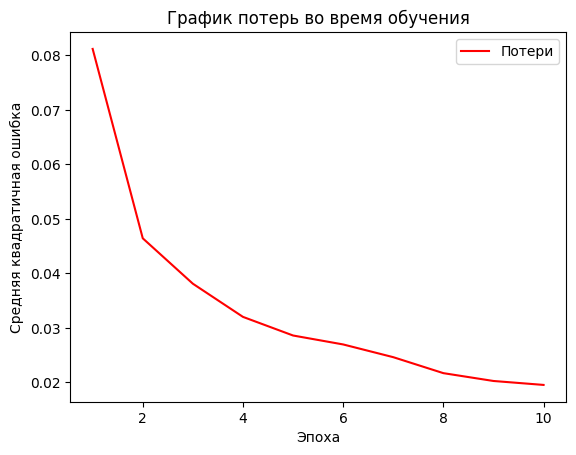

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt  # Для графиков

# === Функции активации ===
def sigmoid(x):
    """Сигмоидная функция активации"""
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    """Производная сигмоиды для градиентного спуска"""
    return x * (1 - x)

# === Класс Персептрона ===
class Perceptron:
    def __init__(self, input_size, output_size, learning_rate=0.25, epochs=10):
        """Инициализация весов, биасов и параметров обучения"""
        self.weights = np.random.uniform(-1, 1, (input_size, output_size))  # Матрица весов [784, 10]
        self.biases = np.random.uniform(-1, 1, output_size)  # Вектор bias [10]
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.loss_history = []  # Список для хранения значений функции потерь

    def predict(self, inputs):
        """Прямой проход (выход сети)"""
        return sigmoid(np.dot(inputs, self.weights) + self.biases)

    def train(self, training_data, labels):
        """Обучение с помощью градиентного спуска"""
        for epoch in range(self.epochs):
            total_loss = 0  # Накопление ошибки за эпоху

            for inputs, expected in zip(training_data, labels):
                output = self.predict(inputs)  # Получаем предсказанный выход
                error = expected - output  # Вычисляем ошибку
                gradient = error * sigmoid_derivative(output)  # Производная ошибки

                # Обновление весов и bias по градиентному спуску
                self.weights += self.learning_rate * np.outer(inputs, gradient)
                self.biases += self.learning_rate * gradient

                # Добавляем квадратичную ошибку в общий loss
                total_loss += np.mean(error**2)

            # Сохраняем средний loss за эпоху
            self.loss_history.append(total_loss / len(training_data))
            print(f"Эпоха {epoch + 1}/{self.epochs}, Потери: {self.loss_history[-1]:.4f}")

    def test(self, test_data, test_labels):
        """Оценка точности модели"""
        predictions = self.predict(test_data)  # Получаем предсказания
        predicted_classes = np.argmax(predictions, axis=1)  # Индексы максимальных значений (классы)
        true_classes = np.argmax(test_labels, axis=1)  # Истинные классы
        accuracy = np.mean(predicted_classes == true_classes) * 100  # Вычисляем точность
        return accuracy

    def plot_loss(self):
        """График функции потерь"""
        plt.plot(range(1, self.epochs + 1), self.loss_history, label="Потери", color="red")
        plt.xlabel("Эпоха")
        plt.ylabel("Средняя квадратичная ошибка")
        plt.title("График потерь во время обучения")
        plt.legend()
        plt.show()

# === Загрузка датасета MNIST через TensorFlow ===
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# === Предобработка данных ===
X_train = X_train.reshape(-1, 28 * 28) / 255.0  # Преобразуем в вектор и нормализуем
X_test = X_test.reshape(-1, 28 * 28) / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)  # One-hot encoding
y_test = tf.keras.utils.to_categorical(y_test, 10)

# === Создание и обучение персептрона ===
perceptron = Perceptron(input_size=784, output_size=10, learning_rate=0.01, epochs=10)
perceptron.train(X_train, y_train)

# === Тестирование ===
accuracy = perceptron.test(X_test, y_test)
print(f"Точность на MNIST: {accuracy:.2f}%")

# === График потерь ===
perceptron.plot_loss()
